# Yash Pilankar- x19216858

# Research Question:Can we predict a song’s popularity based on the features?

In [96]:
#importing all the required libraries

import pandas as pd
from datetime import date
import twitter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')
dataset  = pd.read_csv('spotifyDataset.csv')

# Data Cleaning, Pre-processing & Transformation

In [97]:
dataset.head()

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.239,20


In [98]:
dataset.describe(include = 'all')

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
count,129172,129172,129172,129172.000000,129172.000000,129172.000000,1.291720e+05,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172.000000,129172,129172.000000,129172.000000,129172.000000,129172.000000
unique,129172,30429,106371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10199,NaN,NaN,NaN,NaN
top,5Xg0sSvg7QWWdwW7eCpIE3,['Tadeusz Dolega Mostowicz'],Winter Wonderland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945,NaN,NaN,NaN,NaN
freq,1,952,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1976.579762,0.501950,0.536076,2.328895e+05,0.481096,0.067956,0.194286,5.207050,0.211519,-11.767025,0.703868,NaN,0.105871,116.943154,0.525167,25.915539
std,NaN,NaN,NaN,26.722407,0.379088,0.175803,1.492669e+05,0.271778,0.251671,0.332443,3.516778,0.180989,5.679598,0.456552,NaN,0.182878,30.348323,0.264451,21.876377
min,NaN,NaN,NaN,1920.000000,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1955.000000,0.091800,0.414000,1.662930e+05,0.248000,0.000000,0.000000,2.000000,0.099300,-14.905000,0.000000,NaN,0.035100,93.755500,0.311000,1.000000
50%,NaN,NaN,NaN,1977.000000,0.523000,0.547000,2.056665e+05,0.463000,0.000000,0.000483,5.000000,0.138000,-10.868000,1.000000,NaN,0.045400,115.639500,0.537000,26.000000
75%,NaN,NaN,NaN,1998.000000,0.895000,0.668000,2.658400e+05,0.707000,0.000000,0.234000,8.000000,0.270000,-7.532000,1.000000,NaN,0.076300,135.014000,0.744000,42.000000


In [99]:

print("Check for Null records")
if len(dataset.columns[dataset.isna().any()].tolist()) ==0:
    print("No Null Values")
else:
    print("Null values found in column: {}".format(dataset.columns[dataset.isna().any()].tolist()))

print("Converting duration to mintues from miliseconds")
dataset["duration_ms"] = dataset["duration_ms"]/(1000 * 60)
dataset.rename(columns={"duration_ms" : "duration"},inplace=True)
print("dropping records where tempo = 0")
dataset['songAge'] =  2021 - dataset['year']
#Dropping rows where value of tempo is 0
dataset = dataset[dataset['tempo'] != 0].copy()
print("Calculating Popularity of Artist & Number of Tracks made by Artists")
# Create a copy of the existing dataset to manipulate
temp_dataset = dataset.copy()
temp_dataset_sub = temp_dataset.sample(frac=0.4,random_state=42,axis=0)
temp_dataset_sub.reset_index(drop=True, inplace=True)
# Assign series object of artists and song counts
all_artist_counts = temp_dataset_sub["artists"].value_counts()
# Creating two new feature zero columns
temp_dataset_sub["tracks_number"] = 0
temp_dataset_sub["artist_popularity"] = 0
for index in range(len(temp_dataset_sub)):
    temp_dataset_sub["tracks_number"][index] = all_artist_counts[[temp_dataset_sub["artists"][index]]][0]
    temp_dataset_sub["artist_popularity"][index] = temp_dataset_sub.loc[temp_dataset_sub['artists']==temp_dataset_sub["artists"][index],"popularity"].mean()
print("Using one hot encoding on Key Column")
final_dataset = pd.concat([temp_dataset_sub,pd.get_dummies(temp_dataset_sub["key"], prefix="key")],axis=1)
print("Dropping Columns 'id','artists','name','key','key_11','release_date' ")
final_dataset.drop(columns=['id','artists','name',"key",'key_11','release_date'], inplace=True)
final_dataset.reset_index(inplace=True, drop=True)

Check for Null records
No Null Values
Converting duration to mintues from miliseconds
dropping records where tempo = 0
Calculating Popularity of Artist & Number of Tracks made by Artists
Using one hot encoding on Key Column
Dropping Columns 'id','artists','name','key','key_11','release_date' 


In [100]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               51630 non-null  int64  
 1   acousticness       51630 non-null  float64
 2   danceability       51630 non-null  float64
 3   duration           51630 non-null  float64
 4   energy             51630 non-null  float64
 5   explicit           51630 non-null  int64  
 6   instrumentalness   51630 non-null  float64
 7   liveness           51630 non-null  float64
 8   loudness           51630 non-null  float64
 9   mode               51630 non-null  int64  
 10  speechiness        51630 non-null  float64
 11  tempo              51630 non-null  float64
 12  valence            51630 non-null  float64
 13  popularity         51630 non-null  int64  
 14  songAge            51630 non-null  int64  
 15  tracks_number      51630 non-null  int64  
 16  artist_popularity  516

<AxesSubplot:title={'center':'Songs Released Yearly'}, xlabel='year', ylabel='Count'>

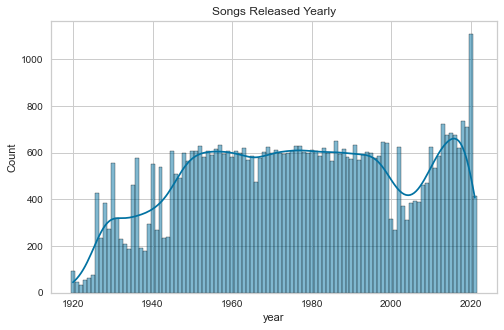

In [101]:
plt.figure(figsize=(8,5))
plt.title("Songs Released Yearly")
sns.histplot(data=final_dataset, x="year", kde=True, discrete=True)

<AxesSubplot:title={'center':'Popularity'}, xlabel='popularity', ylabel='Count'>

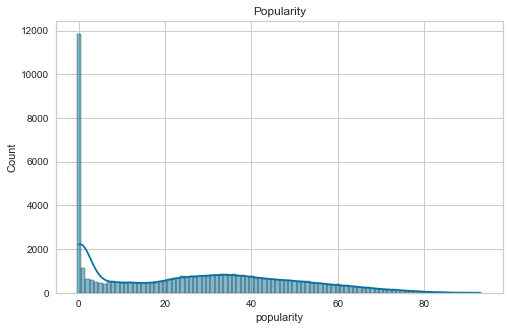

In [102]:
plt.figure(figsize=(8,5))
plt.title("Popularity")
sns.histplot(data=final_dataset, x="popularity", kde=True, discrete=True)

Text(0.5, 0, 'Year')

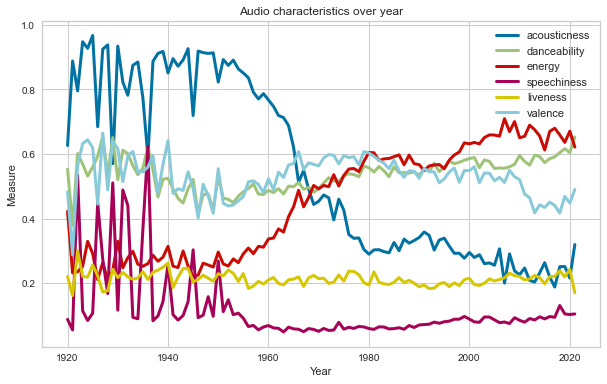

In [103]:
fig,ax = plt.subplots(figsize=(10, 6))
#sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",rc={"lines.linewidth": 3})

columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = final_dataset.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

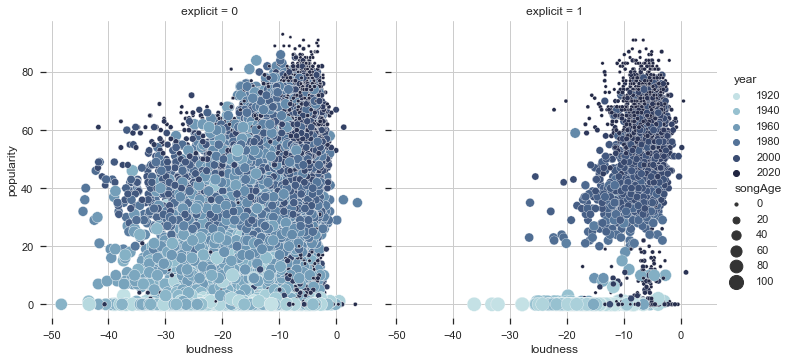

In [104]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=final_dataset,
    x="loudness", y="popularity",
    hue="year", size="songAge",col="explicit",
    palette=cmap, sizes=(10, 200)
)

g.despine(left=True, bottom=True)

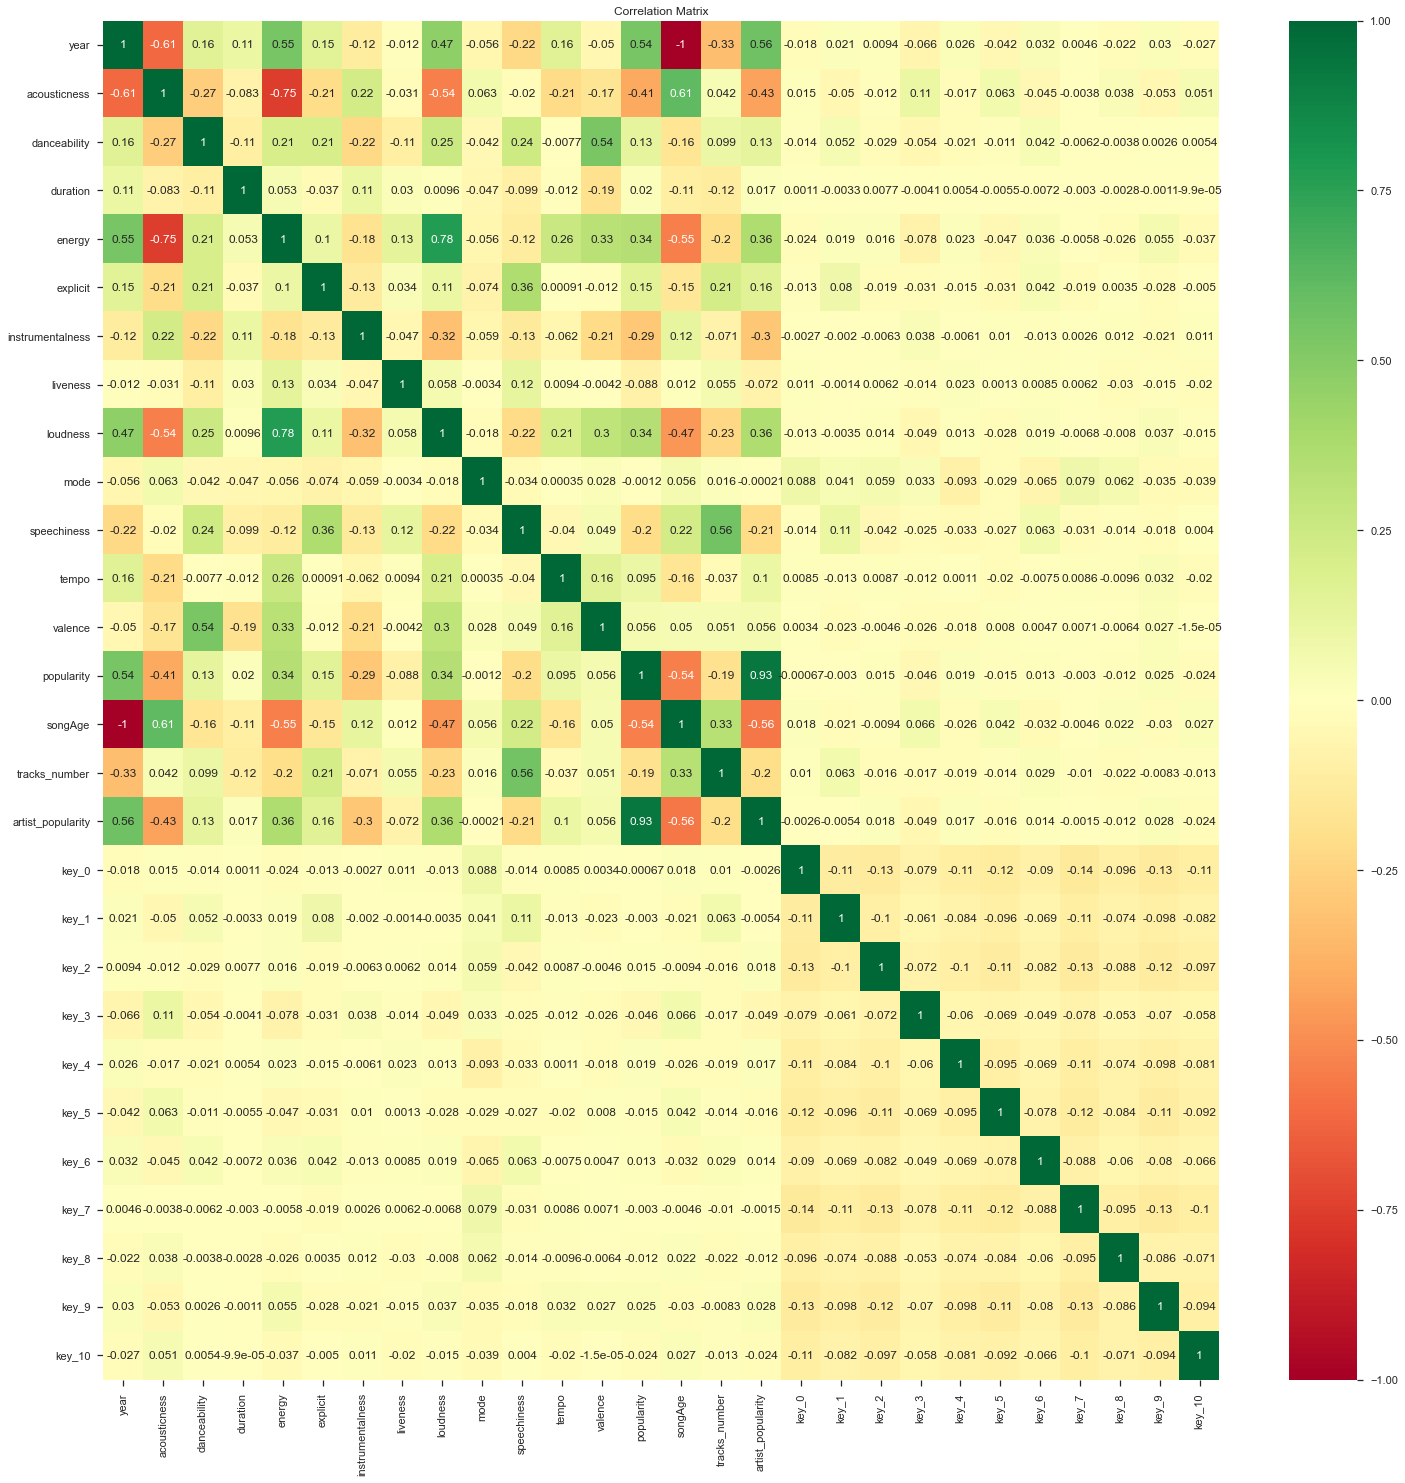

In [105]:

#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
plt.title(label ="Correlation Matrix")
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Text(0.5, 0.98, 'Histogram for All Features')

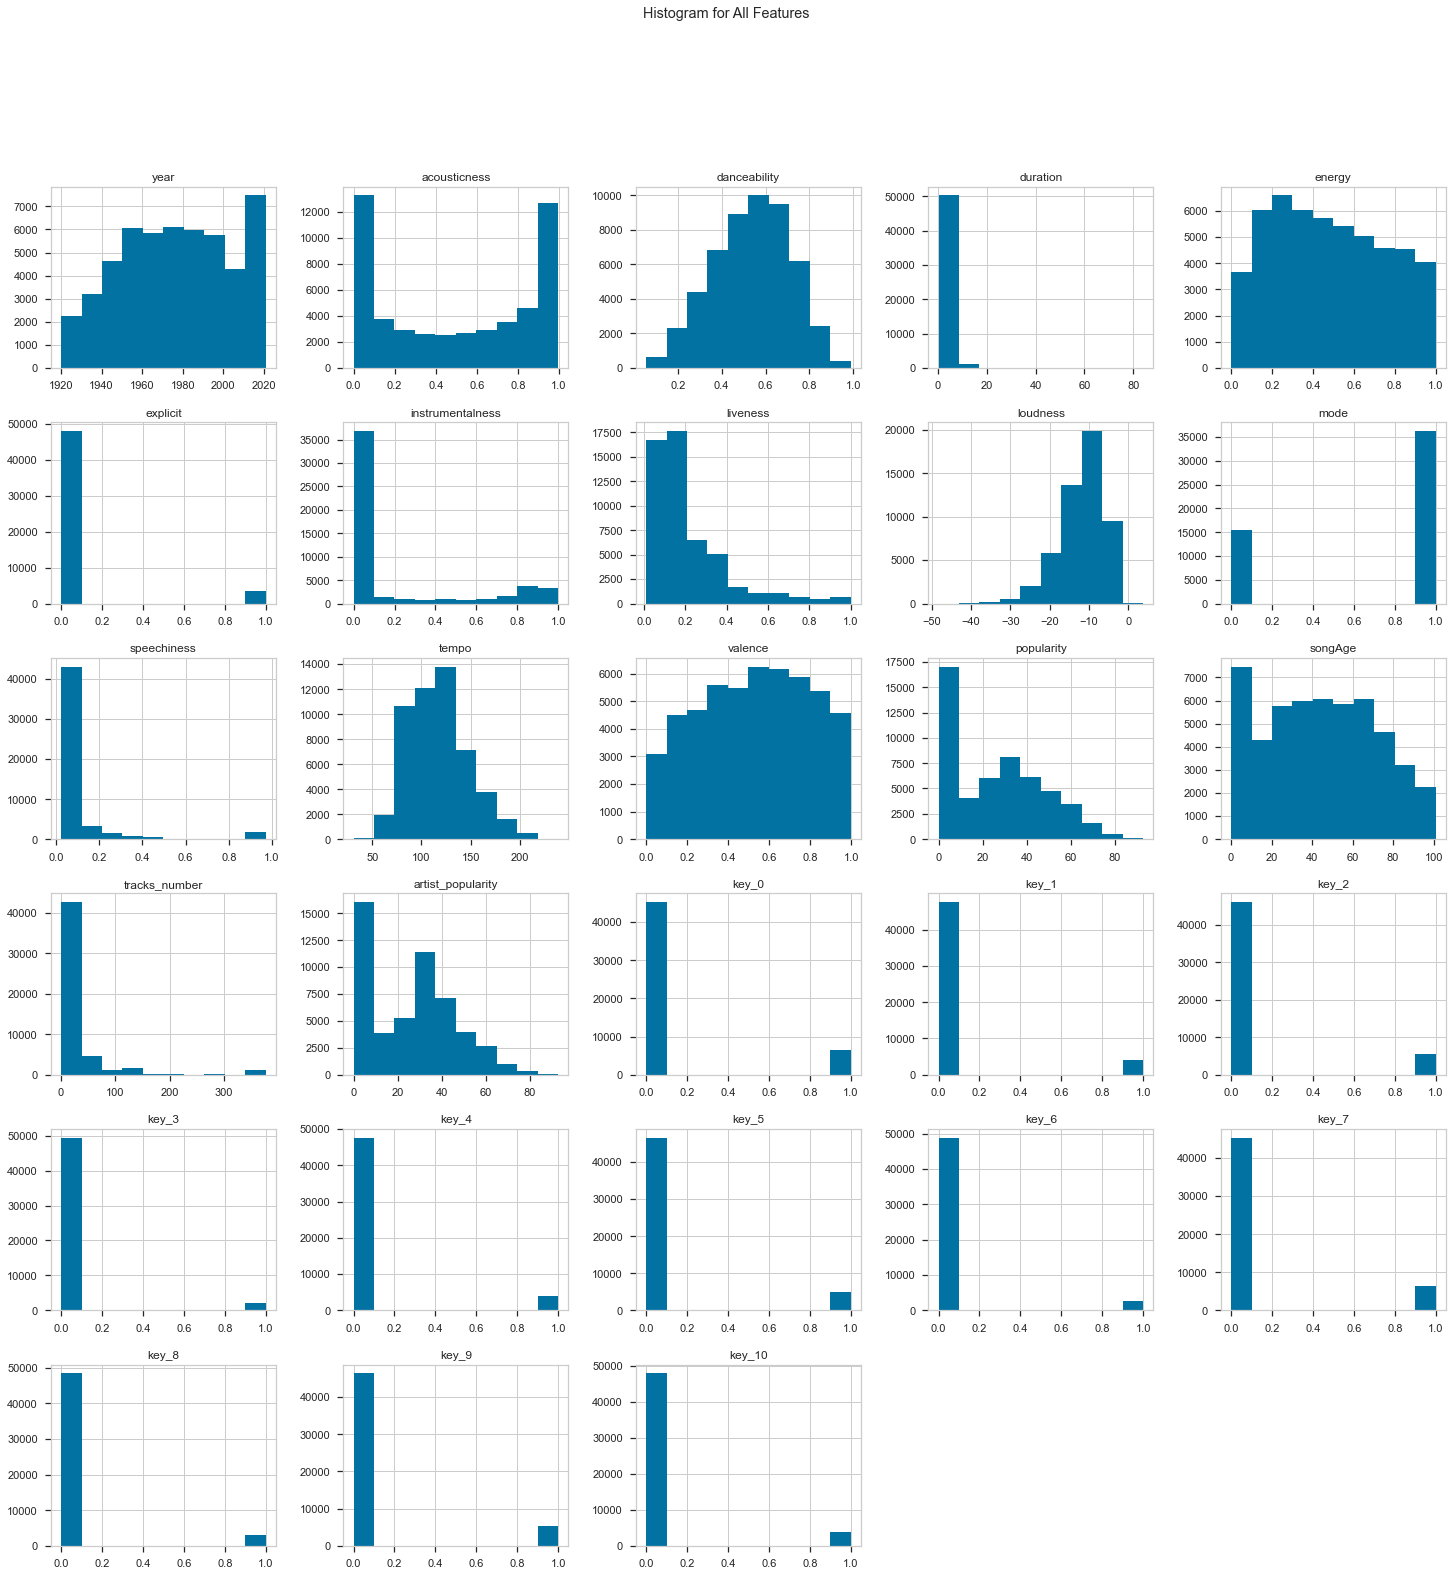

In [106]:
final_dataset.hist(figsize =(25,25))
plt.suptitle("Histogram for All Features")

Text(0.5, 0.98, 'Boxplot for All Features')

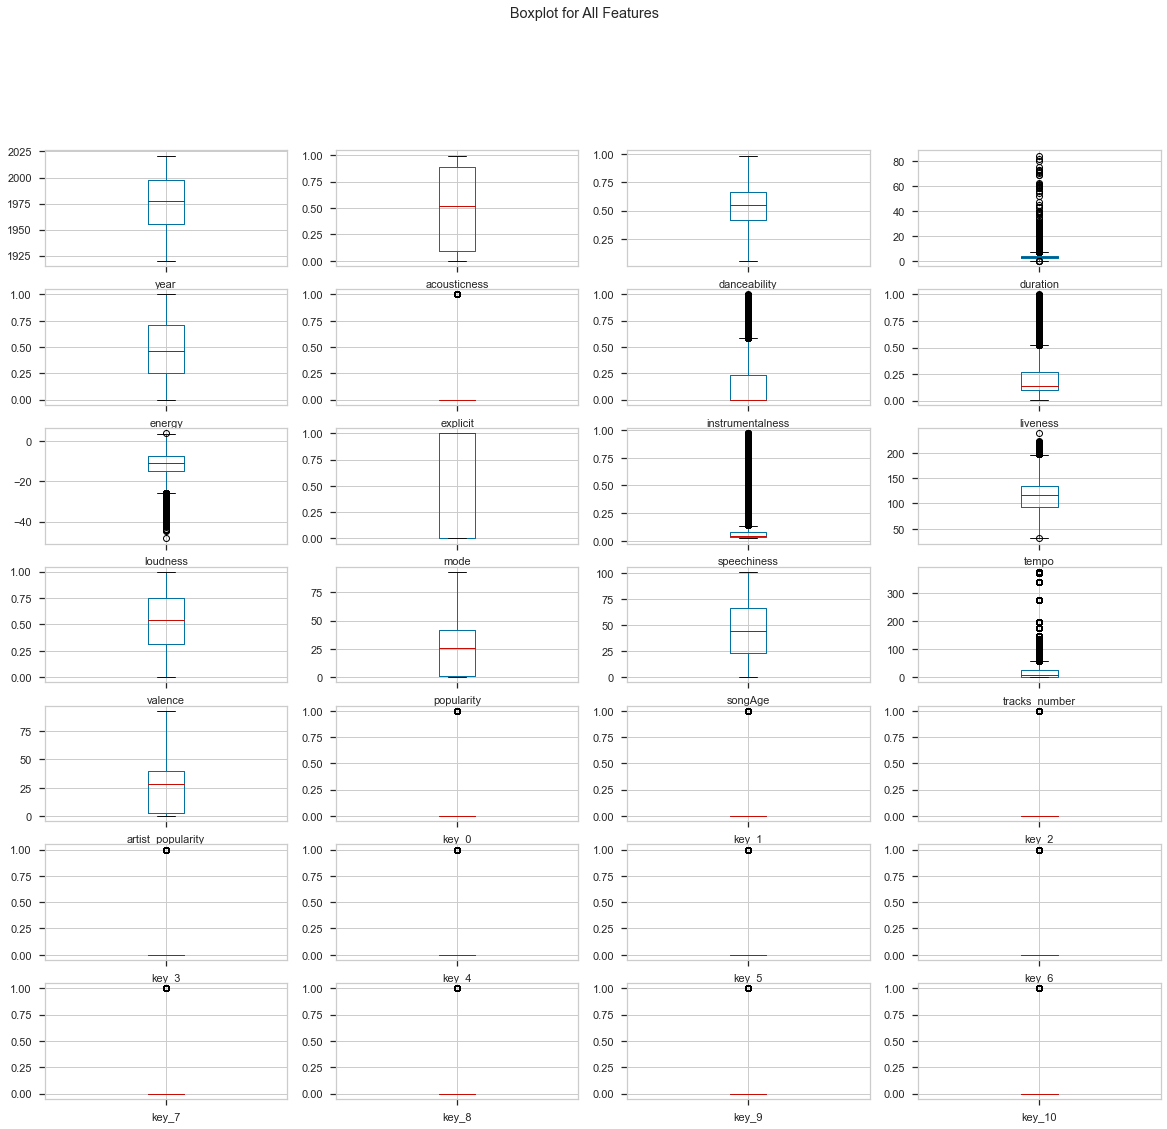

In [107]:
final_dataset.plot(kind='box', figsize=(20,20), layout=(8,4), sharex=False, subplots=True)
plt.suptitle("Boxplot for All Features")

<AxesSubplot:title={'center':'Corelation of Independent Variable with Dependent Variable'}>

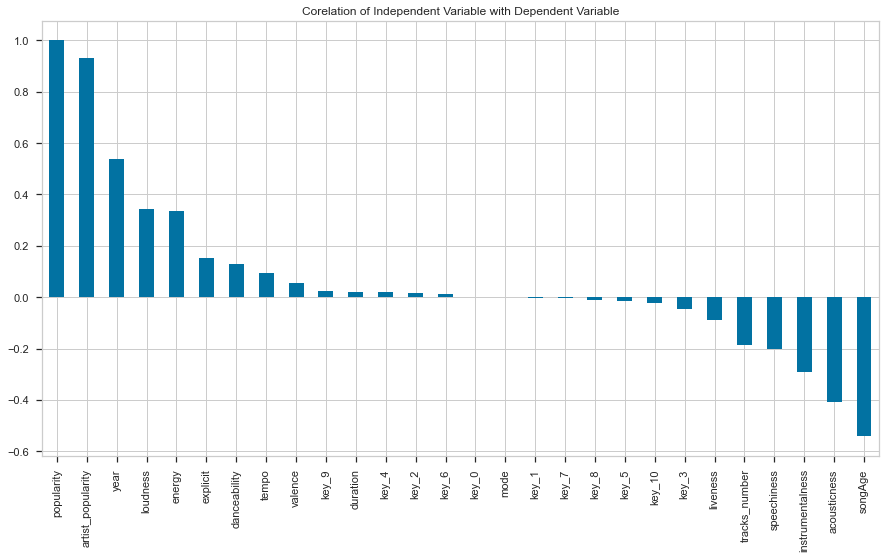

In [108]:
corr_mat = final_dataset.corr()
plt.figure(figsize = (15,8))
plt.title(label= "Corelation of Independent Variable with Dependent Variable")
corr_mat['popularity'].sort_values(ascending = False).plot(kind = 'bar')

In [109]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               51630 non-null  int64  
 1   acousticness       51630 non-null  float64
 2   danceability       51630 non-null  float64
 3   duration           51630 non-null  float64
 4   energy             51630 non-null  float64
 5   explicit           51630 non-null  int64  
 6   instrumentalness   51630 non-null  float64
 7   liveness           51630 non-null  float64
 8   loudness           51630 non-null  float64
 9   mode               51630 non-null  int64  
 10  speechiness        51630 non-null  float64
 11  tempo              51630 non-null  float64
 12  valence            51630 non-null  float64
 13  popularity         51630 non-null  int64  
 14  songAge            51630 non-null  int64  
 15  tracks_number      51630 non-null  int64  
 16  artist_popularity  516

In [110]:

#Change Boolean to Int
final_dataset["key_0"] = final_dataset["key_0"].astype(int)
final_dataset["key_1"] = final_dataset["key_1"].astype(int)
final_dataset["key_2"] = final_dataset["key_2"].astype(int)
final_dataset["key_3"] = final_dataset["key_3"].astype(int)
final_dataset["key_4"] = final_dataset["key_4"].astype(int)
final_dataset["key_5"] = final_dataset["key_5"].astype(int)
final_dataset["key_6"] = final_dataset["key_6"].astype(int)
final_dataset["key_7"] = final_dataset["key_7"].astype(int)
final_dataset["key_8"] = final_dataset["key_8"].astype(int)
final_dataset["key_9"] = final_dataset["key_9"].astype(int)
final_dataset["key_10"] = final_dataset["key_10"].astype(int)


# Feature Selection & Applying Data Mining Models

In [111]:
x = final_dataset.drop(['year','popularity','loudness'], axis = 1) # Features
y = final_dataset['popularity'] # Target
print("Scaling Data using Standard Scaler")
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42) #split data in to 80-20

Scaling Data using Standard Scaler


Linear Regression with K-Fold Cross Validation

In [112]:
# prepare the cross-validation procedure
print("evaluate a logistic regression model using k-fold cross-validation")
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
lr = LinearRegression()
# evaluate model
scores = cross_val_score(lr, X_train,y_train, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print("Score of Cross Validation using 10 Folds: {}".format(list(scores)))
print("Mean Score: {}".format(scores.mean()))
print("Standard Deviation of Score: {}".format(scores.std()))

evaluate a logistic regression model using k-fold cross-validation
Score of Cross Validation using 10 Folds: [0.8659396442751698, 0.8718250249966517, 0.8758775799842471, 0.8634374171123615, 0.860301064390758, 0.8721710775904503, 0.8709155605836831, 0.8570251950468635, 0.8751495037765806, 0.8693462379721945]
Mean Score: 0.868198830572896
Standard Deviation of Score: 0.005999167200302866


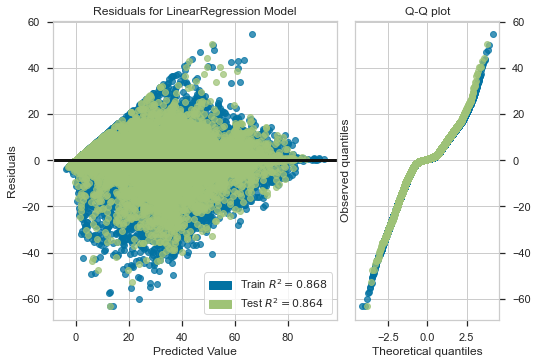

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [113]:
lin_reg = LinearRegression()
#  fit the model on preprocessed train data
lin_reg.fit(X_train, y_train)
#  predictions on the validation set, also preprocessed
lin_reg_pred = lin_reg.predict(X_test)
#Calculate Scores
lin_reg_r2 = metrics.r2_score(y_test,lin_reg_pred)
lin_reg_adjustedr2 = 1-(1-metrics.r2_score(y_test,lin_reg_pred))*(len(y_test-1))/(len(y_test)-X_test.shape[1]-1)
lin_reg_mae = metrics.mean_absolute_error(y_test,lin_reg_pred)
lin_reg_mse = metrics.mean_squared_error(y_test,lin_reg_pred)
lin_reg_rmse = np.sqrt(metrics.mean_squared_error(y_test,lin_reg_pred))
#Visualization
visualizer = ResidualsPlot(lr, hist=False, qqplot=True)
visualizer.fit(X_train,y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

XGBoost Regressor

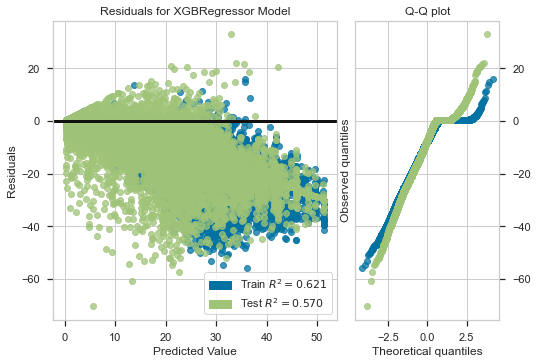

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [114]:
# XGBoost regressor

xgb_regressor = XGBRegressor(n_estimators=100, max_depth=20, learning_rate=0.01)
xgb_regressor.fit(X_train, y_train) #fit the Model
xgb_pred = xgb_regressor.predict(X_test) #predictions on the validation set, also preprocessed
#Calculate Scores
xgb_reg_r2 = metrics.r2_score(y_test,xgb_pred)
xgb_reg_adjustedr2 = 1-(1-metrics.r2_score(y_test,xgb_pred))*(len(y_test-1))/(len(y_test)-X_test.shape[1]-1)
xgb_reg_mae = metrics.mean_absolute_error(y_test,xgb_pred)
xgb_reg_mse = metrics.mean_squared_error(y_test,xgb_pred)
xgb_reg_rmse = np.sqrt(metrics.mean_squared_error(y_test,xgb_pred))
#Visualization

visualizer = ResidualsPlot(xgb_regressor, hist=False, qqplot=True)
visualizer.fit(X_train,y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

K-Neighbors Regressor with Cross Validation

Check for best K using Cross Validation Score


Text(0.5, 1.0, 'K Neighbors Regressor scores for different K values')

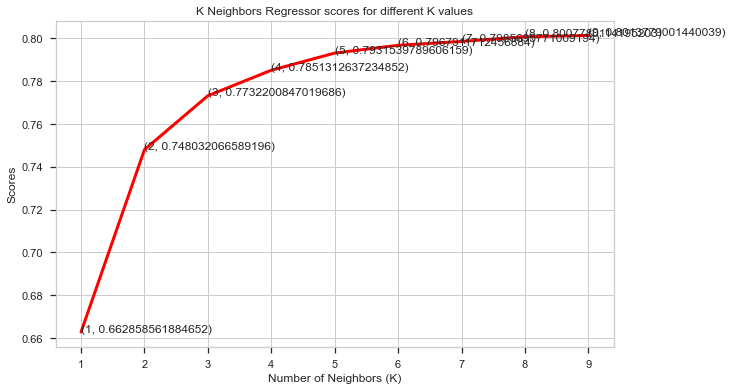

In [118]:
# check for best K value using cross validation
print("Check for best K using Cross Validation Score")
knn_scores = []
for k in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    knn_scores.append(score.mean())

#plot each K value
plt.figure(figsize=(10,6))
plt.plot([k for k in range(1, 10)], knn_scores, color = 'red')

for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Regressor scores for different K values')

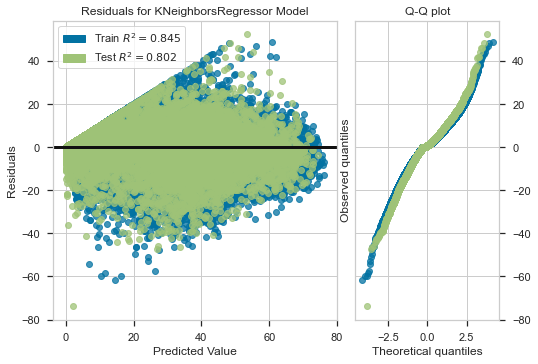

<AxesSubplot:title={'center':'Residuals for KNeighborsRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [116]:

# K-Nearest-Neighbors (KNN) regressor
knn = KNeighborsRegressor(n_neighbors=9)
#Fit the model
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)#predictions on the validation set, also preprocessed
#Calculate Scores
knn_reg_r2 = metrics.r2_score(y_test,knn_pred)
knn_reg_adjustedr2 = 1-(1-metrics.r2_score(y_test,knn_pred))*(len(y_test-1))/(len(y_test)-X_test.shape[1]-1)
knn_reg_mae = metrics.mean_absolute_error(y_test,knn_pred)
knn_reg_mse = metrics.mean_squared_error(y_test,knn_pred)
knn_reg_rmse = np.sqrt(metrics.mean_squared_error(y_test,knn_pred))
visualizer = ResidualsPlot(knn, hist=False, qqplot=True)
visualizer.fit(X_train,y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

# Model Evaluation & Results

In [117]:
results=pd.DataFrame({
    "Algorithm":["Linear Regression","KNN Regression","XGBoost"],
    "R-Square":[lin_reg_r2,knn_reg_r2,xgb_reg_r2],
    "Adjusted R-Square":[lin_reg_adjustedr2,knn_reg_adjustedr2,xgb_reg_adjustedr2],
    "Mean Abs Error":[lin_reg_mae,knn_reg_mae,xgb_reg_mae],
     "Mean square error":[lin_reg_mse,knn_reg_mse,xgb_reg_mse],
      "Root Mean Square Error ":[lin_reg_rmse,knn_reg_rmse,xgb_reg_rmse]})

 

results

,Algorithm,R-Square,Adjusted R-Square,Mean Abs Error,Mean square error,Root Mean Square Error
0,Linear Regression,0.863600,0.863255,4.954850,65.039901,8.064732
1,KNN Regression,0.802095,0.801596,6.936503,94.367041,9.714270
2,XGBoost,0.570291,0.569206,10.124365,204.898635,14.314281
